**1.5p – 1** A partir del dataset **FinancialPhraseBank** utilizando unicamente las frases financieras
con un 100% de coincidencia en la etiqueta realizar las siguientes tareas:
- Bag of words
- TF-IDF
- Word-to-vect


In [1]:
import pandas as pd

In [2]:
dataset_df = pd.read_csv('Sentences_AllAgree.csv',header=None)

In [3]:
dataset_df.columns = ['sentence', 'sentiment', 'sentence_clear', 'label']

Vamos a comprobar que las clases esten balanceadas

In [4]:
dataset_df.value_counts('sentiment')

sentiment
neutral     1390
positive     570
negative     303
dtype: int64

In [5]:
dataset_df.value_counts('label')

label
1    1390
2     570
0     303
dtype: int64

In [6]:
dataset_df.value_counts('label')/dataset_df.value_counts('label').sum()

label
1    0.614229
2    0.251878
0    0.133893
dtype: float64

Podemos ver que los datos no están balanceados.

Vamos a comprobar que no tengamos NANs, para decidir que tratamiento vamos a hacer de estos datos


In [7]:
dataset_df[dataset_df.sentence_clear.isna()]

,sentence,sentiment,sentence_clear,label
1272,It 's not .,neutral,NaN,1


Tenemos un NaN en una frase que solo dice "It's not.", la cual no tiene nada que ver con los bancos. Debería ser negativa, ya que lo único que dice es "esto no es". Vamos a borrar este NaN ya que no nos aporta nada.

In [8]:
dataset_df.dropna(inplace=True)


Vamos a mostrar la primera frase que es la que vamos a tomar como ejemplo

In [9]:
print(dataset_df.sentence[0])
print(dataset_df.sentence_clear[0])
print(dataset_df.sentiment[0],dataset_df.label[0])

According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing .
accord gran  company ha plan move production russia  although company grow 
neutral 1


**Bag of words**

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

Vamos a usar `CountVectorizer`, en el usaremos los siguientes parámetros:
- `lowercase` para convertir todas las palabras a minúsculas
- `stop_words` para inglés
- `token_pattern` para definir las regex


In [11]:
cv = CountVectorizer(lowercase=True,ngram_range = (1,1),stop_words='english',token_pattern=r'[a-zA-Z0-9]+')
text_counts= cv.fit_transform(dataset_df["sentence"])
dense_matrix = pd.DataFrame(text_counts.todense())


Nuestra `dense_matrix` sería la Bag of Words

In [12]:
print(dense_matrix.shape)
print(len(cv.vocabulary_))

(2262, 5855)
5855


In [13]:
cv.vocabulary_

{'according': 576,
 'gran': 2558,
 'company': 1401,
 'plans': 4093,
 'production': 4246,
 'russia': 4650,
 'growing': 2577,
 'quarter': 4334,
 '2010': 175,
 'componenta': 1423,
 's': 4660,
 'net': 3698,
 'sales': 4684,
 'doubled': 1820,
 'eur131m': 2052,
 'eur76m': 2139,
 'period': 4032,
 'year': 5828,
 'earlier': 1872,
 'moved': 3614,
 'zero': 5849,
 'pre': 4178,
 'tax': 5280,
 'profit': 4254,
 'loss': 3307,
 'eur7m': 2140,
 'increased': 2806,
 '5': 345,
 '2': 157,
 'eur': 2037,
 '205': 181,
 'mn': 3565,
 'operating': 3835,
 '34': 266,
 '9': 522,
 '23': 198,
 'rose': 4619,
 '13': 78,
 '1': 39,
 '8': 480,
 '7': 443,
 'corresponding': 1540,
 '2007': 169,
 'representing': 4522,
 'totalled': 5404,
 '21': 185,
 '18': 125,
 '6': 395,
 'finnish': 2337,
 'talentum': 5249,
 'reports': 4516,
 '20': 158,
 '2005': 166,
 '3': 239,
 '2004': 164,
 'totaled': 5402,
 '103': 46,
 '96': 540,
 '4': 298,
 'clothing': 1341,
 'retail': 4560,
 'chain': 1254,
 'sepp': 4815,
 'l': 3138,
 '155': 101,
 '31': 250

Vamos a mostrar la primera frase para después compararlo con TF-IDF

In [14]:
dense_matrix.iloc[0,:][dense_matrix.iloc[0,:]>0]

576     1
1401    2
2558    1
2577    1
4093    1
4246    1
4650    1
Name: 0, dtype: int64

**TF-IDF**

Usaremos la función `TfidfVectorizer` con los mismos parámetros que `CountVectorizer`

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(lowercase=True,ngram_range = (1,1),stop_words='english',token_pattern=r'[a-zA-Z0-9]+')
text_tf= tf.fit_transform(dataset_df["sentence"])
dense_matrix_tf = pd.DataFrame(text_tf.todense())

In [16]:
print(dense_matrix_tf.shape)
print(len(tf.vocabulary_))

(2262, 5855)
5855


In [17]:
dense_matrix_tf.iloc[0,:][dense_matrix_tf.iloc[0,:]>0]

576     0.299543
1401    0.351074
2558    0.482420
2577    0.427381
4093    0.427381
4246    0.302474
4650    0.312236
Name: 0, dtype: float64

**Word-to-vect**

En este apartado usaremos el modelo que genera embeddings `Word2Vec`, para ello le tenemos que pasar los datos como una lista de listas. Es decir una lista que contenga cada frase en otra lista con las palabras que lo contienen. En este caso no vamos a usar stopwords, ya que la finalidad es la representación en el espacio de fases (embedding)

In [18]:
from gensim.models import Word2Vec

In [19]:
list_sentences = dataset_df["sentence_clear"].apply(lambda x: x.split()).tolist()
embbeding = Word2Vec(sentences=list_sentences, vector_size=100, window=5, min_count=1, workers=4) # default parameters


In [20]:
X=embbeding.wv[embbeding.wv.index_to_key]
df_w2v=pd.DataFrame(X, index=embbeding.wv.index_to_key)
df_w2v.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
eur,-0.106452,0.267523,0.079096,0.045174,-0.011050,-0.521345,0.189801,0.677837,-0.141674,-0.182766,...,0.349489,0.148349,0.098032,-0.004044,0.495765,0.327021,0.060692,-0.243710,0.027759,-0.003133
mn,-0.067169,0.146183,0.055766,0.023990,0.007758,-0.284152,0.105793,0.372158,-0.073949,-0.108604,...,0.188321,0.085285,0.061183,-0.014681,0.257474,0.181708,0.053947,-0.125666,-0.005669,0.011363
company,-0.140905,0.364182,0.065644,0.038826,0.014497,-0.681283,0.210397,0.905813,-0.174105,-0.220157,...,0.472604,0.199349,0.136568,0.002606,0.653224,0.441477,0.090537,-0.323586,0.066605,-0.052859
profit,-0.084217,0.192450,0.045427,0.018941,0.005085,-0.359726,0.122858,0.466960,-0.083056,-0.130839,...,0.229384,0.101888,0.063571,-0.001580,0.344907,0.220302,0.054643,-0.172532,0.014099,-0.016995
net,-0.084859,0.194206,0.036444,0.019764,0.007376,-0.367849,0.127430,0.488114,-0.100673,-0.116224,...,0.256080,0.101030,0.075082,-0.002463,0.355222,0.223053,0.052880,-0.164438,0.023610,-0.011522


**0.5p - 2** Visualizar los resultados obtenidos en el ejercicio 1 mediante alguna técnica de
reducción dimensional si fuera necesario.

Primero vamos a mostrar una representación del dataset, después mostraremos una representación para el word2vec

In [21]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
labels = lb.fit_transform(dataset_df.label)

tsne = PCA(n_components=100, svd_solver='full')
np.set_printoptions(suppress=True)
weights = tsne.fit_transform(dense_matrix_tf)


In [22]:
tsne.explained_variance_

array([0.02899156, 0.01099119, 0.00825805, 0.00730087, 0.00621855,
       0.00569687, 0.00534494, 0.00496763, 0.00475362, 0.00436325,
       0.00423617, 0.00401849, 0.00396094, 0.00387667, 0.00376928,
       0.00374713, 0.00359028, 0.00351323, 0.00339138, 0.00334772,
       0.00332632, 0.00326384, 0.0031716 , 0.00308988, 0.00305863,
       0.00299708, 0.00292854, 0.0029154 , 0.00286338, 0.00277622,
       0.00274596, 0.00272852, 0.00262403, 0.00258802, 0.00256429,
       0.00251845, 0.00248343, 0.00242825, 0.00241516, 0.00239033,
       0.00235243, 0.00234155, 0.00231655, 0.00228384, 0.00226938,
       0.00222709, 0.00220845, 0.00219754, 0.00216001, 0.00215115,
       0.00212929, 0.00211448, 0.00206539, 0.00204616, 0.00201139,
       0.0020028 , 0.00197187, 0.00193906, 0.00193749, 0.00190611,
       0.00189579, 0.00188015, 0.00185529, 0.00184711, 0.00182632,
       0.00181362, 0.00180317, 0.00177658, 0.00176557, 0.00175492,
       0.00174899, 0.00173001, 0.00172615, 0.00171173, 0.00170

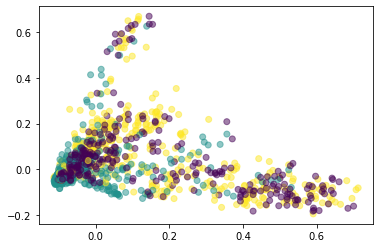

In [23]:
plt.scatter(weights[:,0], weights[:,1], c=labels, alpha=0.5)

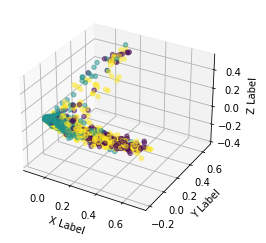

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(weights[:,0],
           weights[:,1],
           weights[:,2],
           c=labels, alpha=0.5,
           zdir='zx')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

Los datos parece que están más próximos que los datasets que probamos en clase, parece que se pueden separar de manera más sencillas los datos verdes y amarillos, no así como los magente que parecen estar algo más mezclados

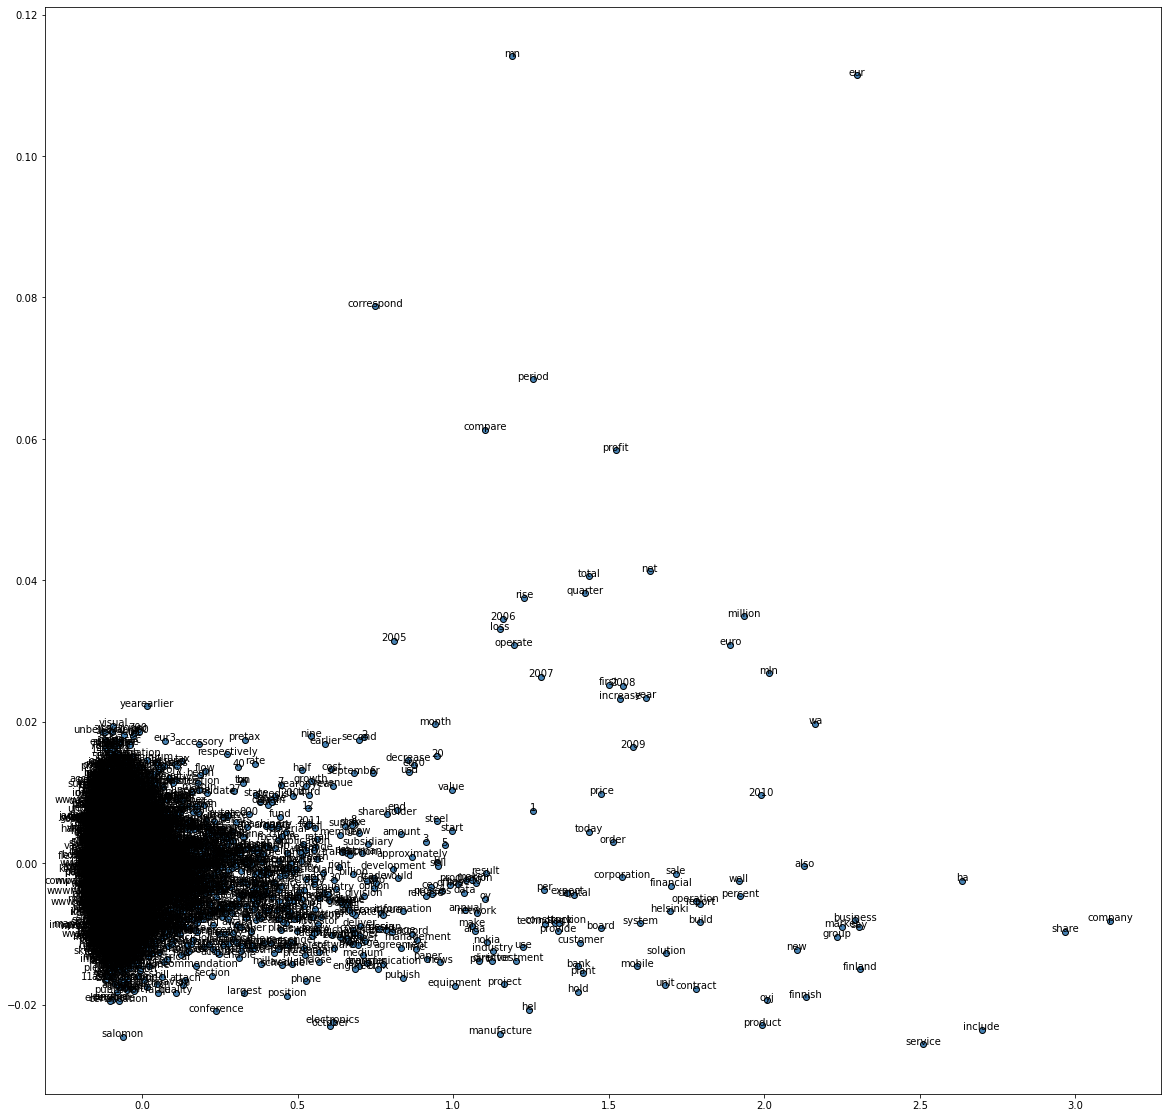

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

PCA = PCA(n_components=2, svd_solver='full')
weights = PCA.fit_transform(df_w2v)
labels = df_w2v.index

plt.figure(figsize=(20, 20))
plt.scatter(weights[:, 0], weights[:, 1], c='steelblue', edgecolors='k')
for label, x, y in zip(labels, weights[:, 0], weights[:, 1]):
    plt.annotate(label, xy=(x, y), ha= 'center')
plt.show()

Podemos compobar que la mayoría del vocabulario está muy concentrado, esto se debe a que todos los textos son financieros y tienen poco rango de datos. Para comprobar que "funciona" más o menos bien podemos ver que *company*, *shares* y *market* están cerca, así como los años o los tiempos verbales.